In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [3]:
#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [47]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

-------------

In [5]:
data = load_data(2021)
data.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


https://github.com/maxbolger/nflfastR-Python-Tutorial

In [11]:
#take a random game

#filter posteam 
data.dtypes

play_id                  int64
game_id                 object
old_game_id              int64
home_team               object
away_team               object
                        ...   
xyac_median_yardage    float64
xyac_success           float64
xyac_fd                float64
xpass                  float64
pass_oe                float64
Length: 372, dtype: object

In [12]:
data.filter(
    ['yards_gained', 'ydstogo', 'air_yards']
    ).describe().round(2)

,yards_gained,ydstogo,air_yards
count,48421.00,50712.00,19639.00
mean,4.05,7.00,7.74
std,7.70,4.94,10.10
min,-28.00,0.00,-19.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,91.00,43.00,65.00


In [13]:
# data['air_yards'] = (
#     np.where(
#     data['air_yards'] < -10, 
#     data['air_yards'].median(), 
#     data['air_yards'])
#     )

In [14]:
df = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data.two_point_attempt==0) &
          (data['epa'].isna()==False) &
          (data['week']<=4)
          ]

In [15]:
df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11471,4436,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,ATL,home,WAS,...,0,1,-0.239808,0.293039,3.175224,1.0,1.000000,0.993894,0.995225,0.477505
11472,4458,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11473,4479,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,ATL,home,WAS,...,0,1,0.527219,NaN,NaN,NaN,NaN,NaN,0.996028,0.397193
11475,4522,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part 3 basic data manipulation

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,epa_bool
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299,False
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415,False
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652,False
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130,False
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50705,3884,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0.482142,0.420278,4.414923,2.0,0.997858,0.462855,0.961070,3.893024,False
50706,3908,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,-0.453694,0.780765,7.801189,4.0,1.000000,1.000000,0.942241,5.775928,False
50707,3930,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,-1.242206,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129545,False
50708,3951,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,NaN,NaN,NaN,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [87]:
df = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data.two_point_attempt==0) &
          (data['epa'].isna()==False) #&
#           (data['week']<=4)
          ]
df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,epa_bool
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299,False
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415,False
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652,False
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130,False
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50705,3884,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0.482142,0.420278,4.414923,2.0,0.997858,0.462855,0.961070,3.893024,False
50706,3908,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,-0.453694,0.780765,7.801189,4.0,1.000000,1.000000,0.942241,5.775928,False
50707,3930,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,-1.242206,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129545,False
50708,3951,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,NaN,NaN,NaN,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [19]:
ay_data = (
    df.groupby(['receiver','posteam'])[['air_yards']]
    .sum()
    .reset_index()
    .sort_values(by=['air_yards'],ascending=False)
    .reset_index(drop=True)
    )

ay_data.head(10)

,receiver,posteam,air_yards
0,J.Jefferson,MIN,2071.0
1,C.Kupp,LA,2017.0
2,J.Chase,CIN,1952.0
3,S.Diggs,BUF,1931.0
4,T.Hill,KC,1884.0
5,M.Evans,TB,1754.0
6,D.Adams,GB,1732.0
7,Dj.Moore,CAR,1730.0
8,T.McLaurin,WAS,1697.0
9,T.Higgins,CIN,1658.0


In [20]:
#cowboys air yards leaders
ay_data[(ay_data.posteam=='DAL')].head(5)

,receiver,posteam,air_yards
26,C.Lamb,DAL,1283.0
29,A.Cooper,DAL,1231.0
63,D.Schultz,DAL,792.0
69,C.Wilson,DAL,739.0
74,M.Gallup,DAL,712.0


In [21]:
#NFCN air yards leaders
ay_data[
        (ay_data.posteam.isin(['MIN','GB','CHI','DET']))
        ].head(10)

,receiver,posteam,air_yards
0,J.Jefferson,MIN,2071.0
6,D.Adams,GB,1732.0
15,D.Mooney,CHI,1552.0
45,M.Valdes-Scantling,GB,985.0
51,A.Thielen,MIN,903.0
58,K.Osborn,MIN,855.0
60,A.St,DET,831.0
71,A.Robinson,CHI,728.0
72,K.Raymond,DET,725.0
73,C.Kmet,CHI,721.0


In [22]:
#air yards leaders excluding NFCN
ay_data[
        (~ay_data.posteam.isin(['MIN','GB','CHI','DET']))
        ].head(10)

,receiver,posteam,air_yards
1,C.Kupp,LA,2017.0
2,J.Chase,CIN,1952.0
3,S.Diggs,BUF,1931.0
4,T.Hill,KC,1884.0
5,M.Evans,TB,1754.0
7,Dj.Moore,CAR,1730.0
8,T.McLaurin,WAS,1697.0
9,T.Higgins,CIN,1658.0
10,D.Metcalf,SEA,1636.0
11,M.Brown,BAL,1622.0


In [23]:
#Nice
ay_data[(ay_data.air_yards==69)]

,receiver,posteam,air_yards
270,T.Sweeney,BUF,69.0
271,T.Jackson,PHI,69.0


### Redzone targets

In [24]:
rz = df[
        (df.yardline_100<20) &
        (df.play_type=='pass')
        ]

rz_tgts = (
    rz.groupby(['receiver','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

rz_tgts.head(10)

,receiver,posteam,play_id
0,C.Kupp,LA,46
1,S.Diggs,BUF,35
2,T.Hill,KC,30
3,D.Adams,GB,28
4,C.Godwin,TB,25
5,H.Renfrow,LV,24
6,M.Evans,TB,23
7,K.Allen,LAC,23
8,D.Johnson,PIT,22
9,C.Brate,TB,22


In [25]:
rz_tgts[
        (rz_tgts.posteam=='SEA') |
        (rz_tgts.posteam=='DAL')
        ]

,receiver,posteam,play_id
18,D.Metcalf,SEA,19
21,A.Cooper,DAL,18
39,D.Schultz,DAL,14
41,E.Elliott,DAL,14
61,C.Lamb,DAL,11
97,C.Wilson,DAL,9
107,G.Everett,SEA,8
114,M.Gallup,DAL,8
129,T.Pollard,DAL,7
131,T.Lockett,SEA,7


### Carries inside the five

In [26]:
inside_5 = data[
                (data.yardline_100<5) &
                (df.play_type=='run')
                ]

carries_5 = (
    inside_5.groupby(['rusher','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

carries_5.head(12)

,rusher,posteam,play_id
0,J.Taylor,IND,26
1,J.Conner,ARI,17
2,D.Harris,NE,15
3,Da.Williams,KC,14
4,J.Mixon,CIN,14
5,L.Fournette,TB,12
6,D.Montgomery,CHI,12
7,A.Ekeler,LAC,12
8,A.Gibson,WAS,12
9,E.Elliott,DAL,12


In [27]:
carries_5[(carries_5.posteam=='ARI')]

,rusher,posteam,play_id
1,J.Conner,ARI,17
37,K.Murray,ARI,5
43,C.Edmonds,ARI,5
113,R.Moore,ARI,1


## Adding Custom Fields of Data
### Calculating Fantasy Points

In [32]:
df1 = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data['epa'].isna()==False) &
          (data['week']<=4)
          ]

df1.sample(3)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
3550,2558,2021_02_DAL_LAC,2021091911,LAC,DAL,REG,2,LAC,home,DAL,...,0,0,-0.975506,0.631123,2.111502,3.0,0.996848,0.991688,0.980532,1.946801
3309,870,2021_02_CIN_CHI,2021091901,CHI,CIN,REG,2,CHI,home,CIN,...,1,1,-0.047156,NaN,NaN,NaN,NaN,NaN,0.489934,51.006639
3639,522,2021_02_DEN_JAX,2021091904,JAX,DEN,REG,2,DEN,away,JAX,...,0,1,0.959976,0.320040,3.357600,2.0,0.998014,0.371389,0.508786,49.121398


In [33]:
# One-Hot Encoding
df1.two_point_conv_result.unique()

array([nan, 'success', 'failure'], dtype=object)

In [34]:
df1  = pd.get_dummies(df1, columns=['two_point_conv_result'])
df1

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,two_point_conv_result_failure,two_point_conv_result_success
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299,0,0
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415,0,0
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652,0,0
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130,0,0
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11471,4436,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,ATL,home,WAS,...,-0.239808,0.293039,3.175224,1.0,1.000000,0.993894,0.995225,0.477505,0,0
11472,4458,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
11473,4479,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,ATL,home,WAS,...,0.527219,NaN,NaN,NaN,NaN,NaN,0.996028,0.397193,0,0
11475,4522,2021_04_WAS_ATL,2021100300,ATL,WAS,REG,4,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [35]:
#this just allows us to see the full length of a column
#so we can read the whole play description
pd.set_option('display.max_colwidth', None)

cols = [
        'desc',
        'two_point_conv_result_success',
        'two_point_conv_result_failure'
        ]

df1[cols][
          (df1.two_point_conv_result_success == 1) |
          (df1.two_point_conv_result_failure == 1)
          ].sample(5)

,desc,two_point_conv_result_success,two_point_conv_result_failure
9004,"TWO-POINT CONVERSION ATTEMPT. 4-D.Prescott pass to 86-D.Schultz is complete. ATTEMPT SUCCEEDS. The Replay Official reviewed the runner broke the plane ruling, and the play was REVERSED. TWO-POINT CONVERSION ATTEMPT. 4-D.Prescott pass to 86-D.Schultz is complete. ATTEMPT FAILS.",0,1
3775,TWO-POINT CONVERSION ATTEMPT. 16-T.Lawrence pass to 17-D.Chark is incomplete. ATTEMPT FAILS.,0,1
9212,(Run formation) TWO-POINT CONVERSION ATTEMPT. 6-B.Mayfield pass to 31-A.Janovich is complete. ATTEMPT SUCCEEDS.,1,0
690,"TWO-POINT CONVERSION ATTEMPT. 15-P.Mahomes pass to 25-C.Edwards-Helaire is incomplete. ATTEMPT FAILS. Penalty on KC-52-C.Humphrey, Ineligible Downfield Pass, declined.",0,1
2892,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 16-J.Goff pass to 87-Q.Cephus is complete. ATTEMPT SUCCEEDS.,1,0


In [36]:
df1['fpts_skill'] = (
    df1['yards_gained'] * 0.1 +
    df1['complete_pass'] * 1 +
    df1['touchdown'] * 6 +
    df1['two_point_conv_result_success'] * 2 +
    df1['fumble_lost'] * -2
    )

In [39]:
cols = ['desc','yards_gained','fpts_skill']
df1[cols].sample(5)

,desc,yards_gained,fpts_skill
6719,(15:00) (Shotgun) 7-B.Roethlisberger pass deep left to 14-R.McCloud ran ob at PIT 48 for 24 yards (30-J.Bates).,24.0,3.4
1690,"(2:16) (No Huddle, Shotgun) PENALTY on NE-53-K.Van Noy, Neutral Zone Infraction, 5 yards, enforced at NE 39 - No Play.",0.0,0.0
10324,(9:24) (Shotgun) 10-J.Herbert pass short left to 87-J.Cook to LV 37 for 13 yards (52-D.Perryman).,13.0,2.3
1771,"(2:36) 34-M.Brown right tackle to MIA 25 for 5 yards (50-C.Winovich, 93-L.Guy).",5.0,0.5
6367,(13:29) 14-S.Darnold pass incomplete short left [52-J.Greenard].,0.0,0.0


In [40]:
receiving_fpts = (df1.groupby(
    ['receiver','posteam']
    )[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'receiver':'player'}))


In [41]:
rushing_fpts = (df1.groupby(
    ['rusher','posteam']
    )[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'rusher':'player'}))

In [42]:
fpts_skill = pd.merge(
    receiving_fpts, rushing_fpts, on=['player','posteam'], how='outer'
    ).fillna(0)

fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y
0,C.Kupp,LA,103.1,-0.5
1,T.Hill,KC,97.3,3.0
2,D.Samuel,SF,93.0,0.9
3,Dj.Moore,CAR,87.8,1.9
4,M.Williams,LAC,79.8,0.0


In [43]:
fpts_skill['total_fpts'] = (
    fpts_skill['fpts_skill_x'] + 
    fpts_skill['fpts_skill_y']
    )

fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts
0,C.Kupp,LA,103.1,-0.5,102.6
1,T.Hill,KC,97.3,3.0,100.3
2,D.Samuel,SF,93.0,0.9,93.9
3,Dj.Moore,CAR,87.8,1.9,89.7
4,M.Williams,LAC,79.8,0.0,79.8


## Part 4 - Data Viz!
### Basic Visualization

In [44]:
metrics = (
    df[
       (df.play_type=='pass')
       ]
       .groupby(['receiver','posteam'])
       .agg({'play_id':'count','air_yards':'sum','complete_pass':'sum'})
       .reset_index()
       .sort_values(by=['air_yards'],ascending=False)
       .reset_index(drop=True)
       .rename(columns = {'play_id':'targets','receiver':'player'})
       )

metrics.head(10)

,player,posteam,targets,air_yards,complete_pass
0,J.Jefferson,MIN,167,2071.0,108.0
1,C.Kupp,LA,233,2017.0,178.0
2,J.Chase,CIN,163,1952.0,106.0
3,S.Diggs,BUF,174,1931.0,109.0
4,T.Hill,KC,187,1884.0,134.0
5,M.Evans,TB,140,1754.0,91.0
6,D.Adams,GB,180,1732.0,132.0
7,Dj.Moore,CAR,163,1730.0,93.0
8,T.McLaurin,WAS,130,1697.0,77.0
9,T.Higgins,CIN,140,1658.0,92.0


In [45]:
viz = pd.merge(
    fpts_skill, metrics, on=['player','posteam']
    ).sort_values(by=['total_fpts'],ascending=False).reset_index(drop=True)

viz.head(10)

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts,targets,air_yards,complete_pass
0,D.Henry,TEN,26.5,77.2,103.7,20,-3.0,18.0
1,C.Kupp,LA,103.1,-0.5,102.6,233,2017.0,178.0
2,T.Hill,KC,97.3,3.0,100.3,187,1884.0,134.0
3,D.Samuel,SF,93.0,0.9,93.9,135,1061.0,87.0
4,Dj.Moore,CAR,87.8,1.9,89.7,163,1730.0,93.0
5,C.Patterson,ATL,71.5,17.9,89.4,69,201.0,52.0
6,A.Ekeler,LAC,44.1,42.5,86.6,94,171.0,70.0
7,M.Williams,LAC,79.8,0.0,79.8,129,1497.0,76.0
8,T.McLaurin,WAS,78.4,0.0,78.4,130,1697.0,77.0
9,J.Jefferson,MIN,77.9,0.0,77.9,167,2071.0,108.0


In [48]:
pip install adjustText


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7099 sha256=be256c0d14cada92da05de11a4cbdcc629b184f64b828e730449cb8e99535cfd
  Stored in directory: c:\users\chill\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
Successfully built adjustText


In [49]:
from adjustText import adjust_text

In [50]:
receivers = receiving_fpts.player.to_list()[:30]
viz = viz[(viz.player.isin(receivers))]

In [51]:
viz = viz[
          ~((viz.player=='T.Hill') & (viz.posteam=='NO')) &
          ~((viz.player=='A.Kamara') & (viz.posteam=='NO'))
          ]

Text(0.8, 0.06, 'Data: nflfastR')

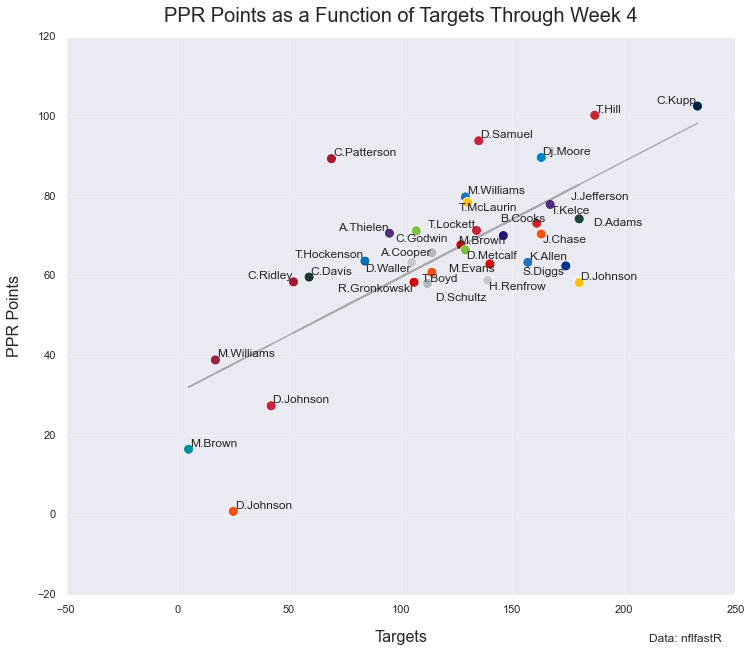

In [52]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Create the scatterplot
sns.scatterplot(x = viz.targets, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.targets, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(viz.targets, viz.total_fpts, 1)

plt.plot(viz.targets, m*viz.targets + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Targets Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Targets',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

#Save figure if you wish
#plt.savefig('_name_.png',dpi=300)

Text(0.8, 0.06, 'Data: nflfastR')

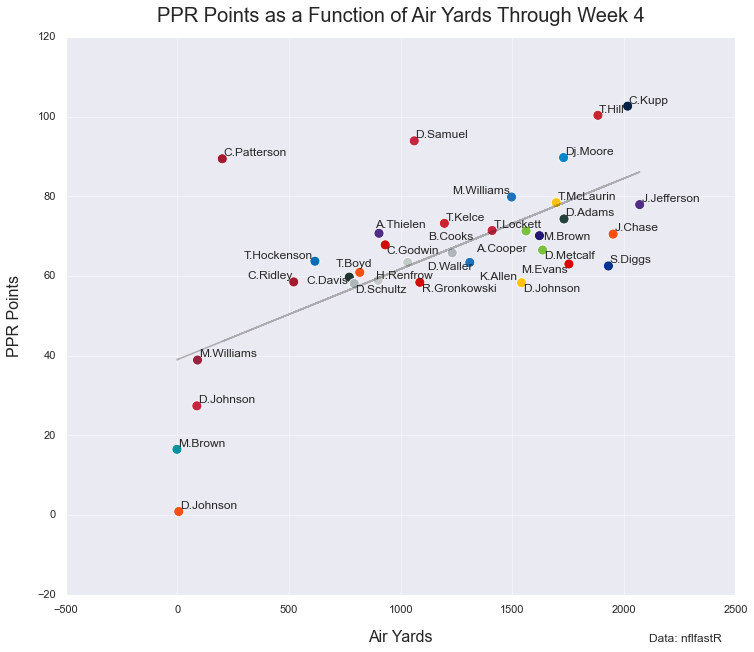

In [53]:


#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Subset the top 30 players by wopr (we don't want a crowded plot)
viz = viz[(viz.player.isin(receivers))]

#Create the scatterplot
sns.scatterplot(x = viz.air_yards, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.air_yards, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend lines for the metrics
m, b = np.polyfit(viz.air_yards, viz.total_fpts, 1)

plt.plot(viz.air_yards, m*viz.air_yards + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Air Yards Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Air Yards',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

#Save figure if you wish
#plt.savefig('_name_.png',dpi=300)



In [54]:
def ay_distribution(receiver, team):
  
  '''
  This function plots the air yards distribution
  for any given NFL player
  
  Parameters: 
    receiver (str): The name of the player in nflfastR
    format (J.Doe) 
  
    team (str): The team that receiver is currently on

  '''

  #Create a figure
  fig, ax = plt.subplots(figsize=(10,10))

  #Subset our data to include passes only for the
  #player and team we choose
  ay_dist = data[
                 (data.play_type=='pass') &
                 (data.qb_dropback==1) &
                 (data.epa.isna()==False) &
                 (data.receiver==receiver) &
                 (data.posteam==team)
                 ]

  #Add grid
  ax.grid(zorder=0,alpha=.4)
  ax.set_axisbelow(True)

  #Set x-axis limits
  ax.set_xlim(-10,50)

  #Add colors
  COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D',
            'CAR':'#0085CA','CHI':'#00143F','CIN':'#FB4F14','CLE':'#FB4F14',
            'DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
            'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430',
            'LA':'#002147','LAC':'#2072BA','LV':'#C4C9CC','MIA':'#0091A0',
            'MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
            'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142',
            'SF':'#C9243F','TB':'#D40909','TEN':'#4095D1','WAS':'#FFC20F'}

  #Create plot
  sns.kdeplot(ay_dist.air_yards,fill=True,color=COLORS.get(team))

  #Add title, labels, and cite the data source.
  #the formatted string allows to pass the receiver
  #parameter input to the title
  plt.title(f"{receiver}'s Air Yards Distribution",fontsize=20)
  plt.xlabel('Air Yards',fontsize=14)
  plt.ylabel('Density',fontsize=14)
  plt.figtext(0.8,0.06,'Data: nflfastR')

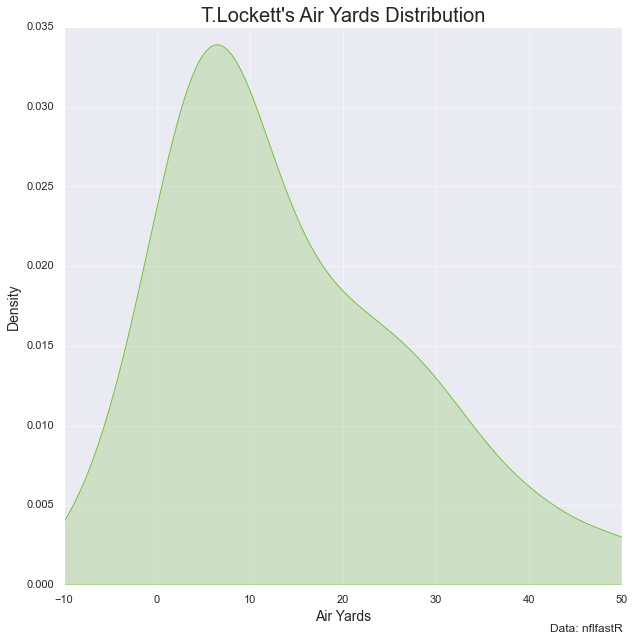

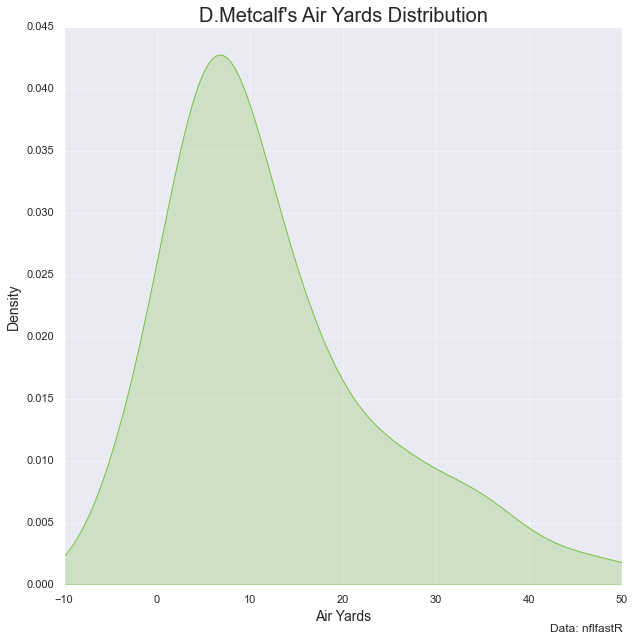

In [55]:
ay_distribution('T.Lockett','SEA')
ay_distribution('D.Metcalf','SEA')

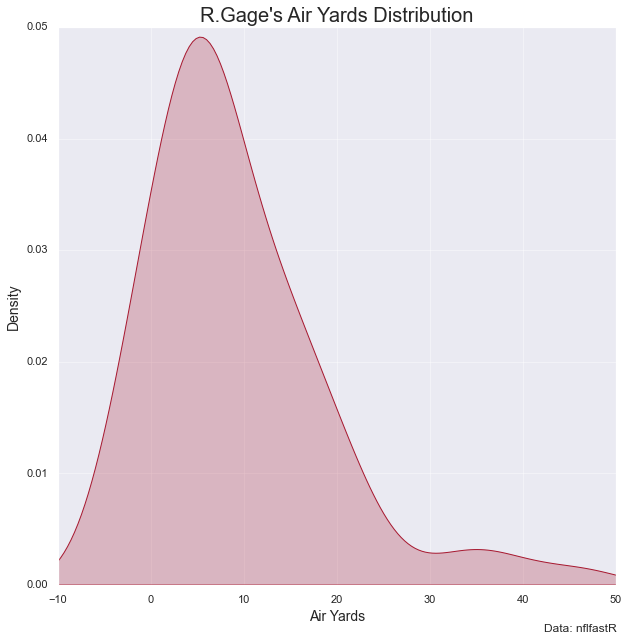

In [56]:
ay_distribution('R.Gage','ATL')

In [64]:
# What types of play in a game
data.play_type.unique()[0]
# nan: end of play
data[data.play_type.isna()]
data.groupby(['game_id', 'play_type'])['play_type'].count()

game_id          play_type  
2021_01_ARI_TEN  extra_point     7
                 field_goal      3
                 kickoff        10
                 no_play        17
                 pass           76
                                ..
2021_22_LA_CIN   no_play        11
                 pass           85
                 punt           12
                 qb_kneel        2
                 run            41
Name: play_type, Length: 2262, dtype: int64

In [66]:
test = data[data.play_type.isna()]
test.groupby(['game_id'])['play_id'].count()


game_id
2021_01_ARI_TEN    8
2021_01_BAL_LV     8
2021_01_CHI_LA     7
2021_01_CLE_KC     7
2021_01_DAL_TB     7
                  ..
2021_20_LA_TB      7
2021_20_SF_GB      7
2021_21_CIN_KC     8
2021_21_SF_LA      7
2021_22_LA_CIN     8
Name: play_id, Length: 285, dtype: int64

In [74]:
data['epa_bool']=data.epa.isna()

In [78]:
data['epa_bool'].sum()/data.shape[0]

0.016859914813061996

In [79]:
#see which play type has assigned EPA values
data.groupby(['play_type', 'epa']).count()
data.epa.isna().sum()/data.epa.size
data.groupby(['play_type'])['epa_bool'].count()/data.shape[0]

play_type
extra_point    0.026049
field_goal     0.021218
kickoff        0.057422
no_play        0.093035
pass           0.414300
punt           0.043126
qb_kneel       0.008045
qb_spike       0.001459
run            0.290976
Name: epa_bool, dtype: float64

In [86]:
# all no_play ave epa values
data[data.play_type.isin(['no_play'])].epa_bool

11       False
12       False
13       False
20       False
21       False
         ...  
50696    False
50697    False
50698    False
50700    False
50708    False
Name: epa_bool, Length: 4718, dtype: bool

### EPA

In [89]:
epa_df = df = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data['epa'].isna()==False)
          ]
epa_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,epa_bool
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299,False
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415,False
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652,False
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130,False
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50705,3884,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0.482142,0.420278,4.414923,2.0,0.997858,0.462855,0.961070,3.893024,False
50706,3908,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,-0.453694,0.780765,7.801189,4.0,1.000000,1.000000,0.942241,5.775928,False
50707,3930,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,-1.242206,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129545,False
50708,3951,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,NaN,NaN,NaN,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [95]:
epa_df['home_team_win'].unique()

array([0. , 1. , 0.5])

In [94]:
epa_df['home_team_win'] = -1
epa_df.loc[epa_df.result > 0, 'home_team_win'] = 1
epa_df.loc[epa_df.result < 0, 'home_team_win'] = 0
epa_df.loc[epa_df.result == 0, 'home_team_win'] = 0.5


<ipython-input-94-c4c0f4359e46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epa_df['home_team_win'] = -1
c:\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

2        0.0
3        0.0
4        0.0
6        0.0
7        0.0
        ... 
50705    0.0
50706    0.0
50707    0.0
50708    0.0
50709    0.0
Name: home_team_win, Length: 40484, dtype: float64

In [106]:
#how epa relates to winning a game
result = epa_df.groupby(['game_id', 'posteam'])[['epa']].mean()
result.reset_index()

,game_id,posteam,epa
0,2021_01_ARI_TEN,ARI,0.158533
1,2021_01_ARI_TEN,TEN,-0.326721
2,2021_01_BAL_LV,BAL,-0.040739
3,2021_01_BAL_LV,LV,0.004540
4,2021_01_CHI_LA,CHI,-0.114370
...,...,...,...
565,2021_21_CIN_KC,KC,0.007644
566,2021_21_SF_LA,LA,0.085424
567,2021_21_SF_LA,SF,-0.052629
568,2021_22_LA_CIN,CIN,-0.186360


<AxesSubplot:>

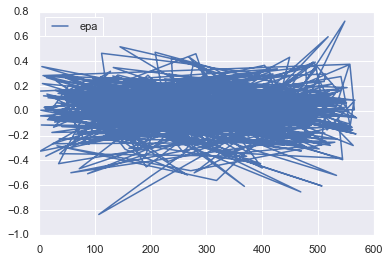

In [114]:
r.sort_values('posteam').plot()

TypeError: unhashable type: 'numpy.ndarray'

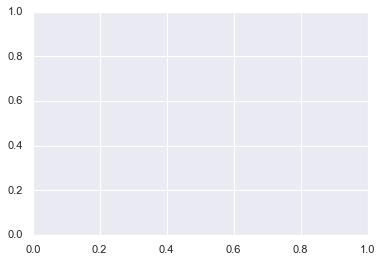

In [110]:
r = result.reset_index()
plt.plot()